```
Drs. Allison Horst, Alison Presmanes Hill (RStudio), and Dr. Kristen  
B. Gorman (Palmer Station, University of Alaska Fairbanks)  
collaborated on developing the palmerpenguins R package. The dataset  
features structural size measurements for three penguin  
species: Adelie, Gentoo, and Chinstrap. The meticulous work  
conducted by Dr. Kristen B. Gorman and her team at Palmer Station  
Long-Term Ecological Research site in Antarctica exemplifies their  
curiosity, attention to detail, and adherence to rigorous  
methodologies, resulting in high-quality data.

In addition to Ronald Fisher's Iris dataset, the palmerpenguins  
dataset offers distinct variables that enable researchers and  
practitioners to perform comprehensive analyses and conduct  
algorithmic testing. By utilizing both datasets as benchmarks,  
professionals can expand the application of machine learning  
algorithms while enhancing their appreciation of the penguin  
species.
```
dataset home: https://allisonhorst.github.io/palmerpenguins/  
git fanClub: https://github.com/mcnakhaee/palmerpenguins  

## **`palmerpenguins assignment overview`**


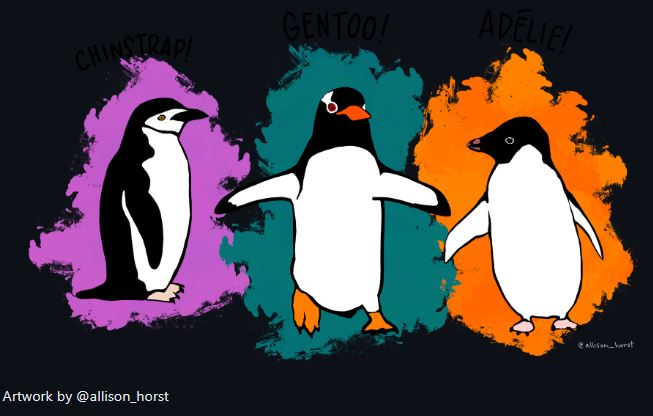

**`Stage.1=> Dataset Inspection and Preprocessing`**  
```
- 1.1 Load the Palmer Penguins dataset into a suitable data structure.  
- 1.2 Address missing values via imputation or removal.  
- 1.3 Assess descriptive statistics and visualize the distributions of feature and target variables.  
- 1.4 Assess the correlations between feature and target variables.  
```

**`Stage.2=> Feature Selection and Engineering`**  
```
- 2.1 Identify features to the prediction of penguin species.  
- 2.2 Select the most informative features using feature selection techniques
 like univariate analysis, feature importance ranking, and dimensionality reduction.  
- 2.3 Consider engineering new features by combining or transforming existing features.  
- - Huh? It's as simple as multiplying one variable with another in hopes of improving predictive power.  
```

**`Stage.3=> (Pick 4) Machine learning and Hyperparameter Tuning`**  
```
- 3. Fine-tune the hyperparameters to optimize their performance.  
-  Use techniques like grid or random search to explore different  
  combinations of hyperparameters and their configuration.  
- 3 Validate tuned models on testing data sets.  
```
- `Stage.3 NEW Learning goal`
- `3.3.note=>` the objective is to take extra time and `read` the  
scikit-learn algorithm homepage to assess features and parameters.  
- Attempt to tune a couple parameters and add a bullet of what you  
did in the executive summary.  


**`Part 4=> Model Interpretation and Validation`**  
```
- 4.1 Interpret the trained models to understand the relationship  
=> between their features and the predicted penguin species.  
- 4.2 Ensure robustness and reliability and validate with items like    
=>  k-fold, cross-validation, and holdout to name a few.  
```

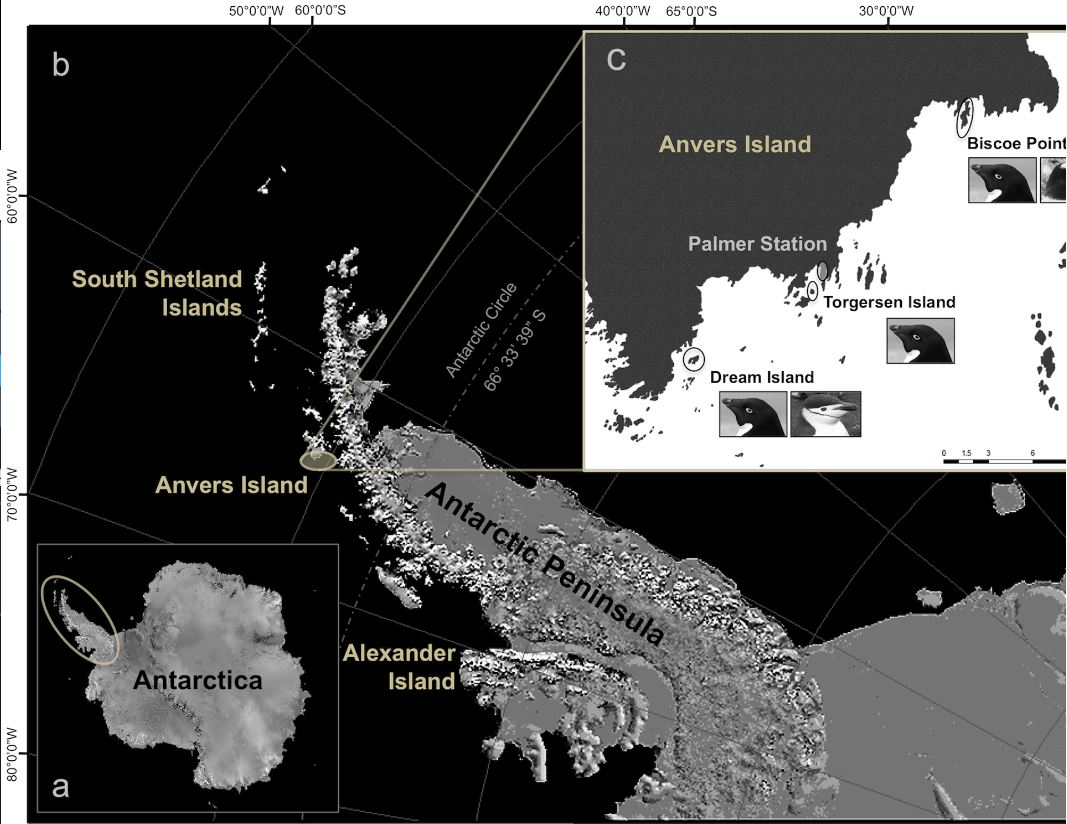  

References  
Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081  
- [link](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081)  

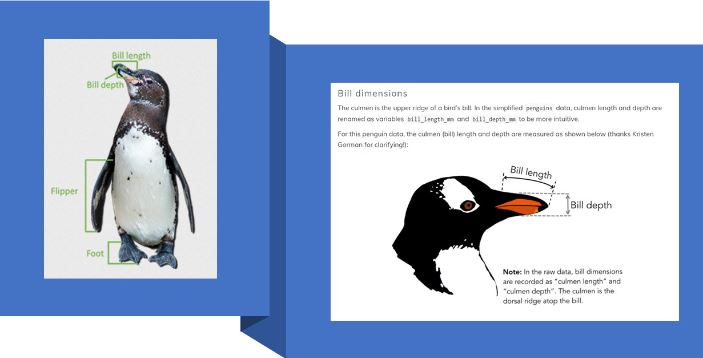


## **`Penguin`** **=>** **`Enter Your Executive Summary`**

### **`Executive Summary`**
- #### Accumulate pertinent learnings and outcomes as bullets.  
- #### Include one or two graphs if `>2.st.dev`  

#=>Answer: Executive summary about dataset
<br>The Palmer penguins dataset proved deceptively simple but was initially plagued by a series of procedural missteps that led to overfitting and data leakage. Early in the project I engineered a profusion of interaction and polynomial features, applied scaling before splitting, and even imputed and dropped values after creating my training, validation, and hold-out sets—unwittingly allowing information from the test folds to bleed into model fitting. I also inadvertently scaled my inputs twice. These mistakes inflated my in-sample performance and eroded confidence in my results.<br>
Reorganizing the notebook—splitting the data first, then consistently applying imputation, encoding, scaling, and feature construction via reusable functions—immediately remedied these issues. Once the workflow was encapsulated in discrete, train-only transformations, four different classifiers (logistic regression, k-NN, decision tree, and random forest) all achieved similarly high accuracy, both in cross-validation and on the untouched hold-out set. This reinforced the observation that, given the low intrinsic variability in the penguins data, even simple linear models can separate species with minimal effort.<br>
The greatest challenge of the exercise was rigorously enforcing each step of the machine-learning pipeline and resisting the temptation to tinker with features after seeing validation results. Revisiting my old master’s-level notebooks and coursework refreshed my understanding of best practices—particularly the importance of isolating train, validation, and test stages. In hindsight, adopting scikit-learn’s Pipeline abstraction from the outset would have further streamlined the workflow, guaranteed consistency across splits, and minimized the cognitive overhead of tracking which transformations had been applied where.



## **`Penguin analysis stages`**

### **`Stage.1.`** **=>**  **`Part 1: Dataset Inspection and Preprocessing`**  

**`Stage.1: Dataset Inspection and Preprocessing`**  
```
- 1.1 Load the Palmer Penguins dataset into a suitable data structure.  
- 1.2 Address missing values via imputation or removal.  
- 1.3 Assess descriptive statistics and visualize the distributions of feature and target variables.  
- 1.4 Assess the correlations between feature and target variables.  
```

`Stage.1.Tasks and outcomes`   
`Stage.1.Task.1` => Given prior learnings logically assemble your data preprocessing.   
`Stage.1.Task.2` => Add pertinent learnings and outcomes as bullets to the Executive Summary.  

In [2]:
#=>Enter Solution analysis


In [1]:
import matplotlib.pyplot as plt
# !pip install palmerpenguins
from palmerpenguins import load_penguins  
df = load_penguins()

print(df.shape)
df.head()

#Missing Values
print(df.isna().sum())

# Mean impute
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

(344, 8)
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


/Users/kevhhu/miniforge3/envs/irisarm/lib/python3.11/site-packages/palmerpenguins/penguins.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


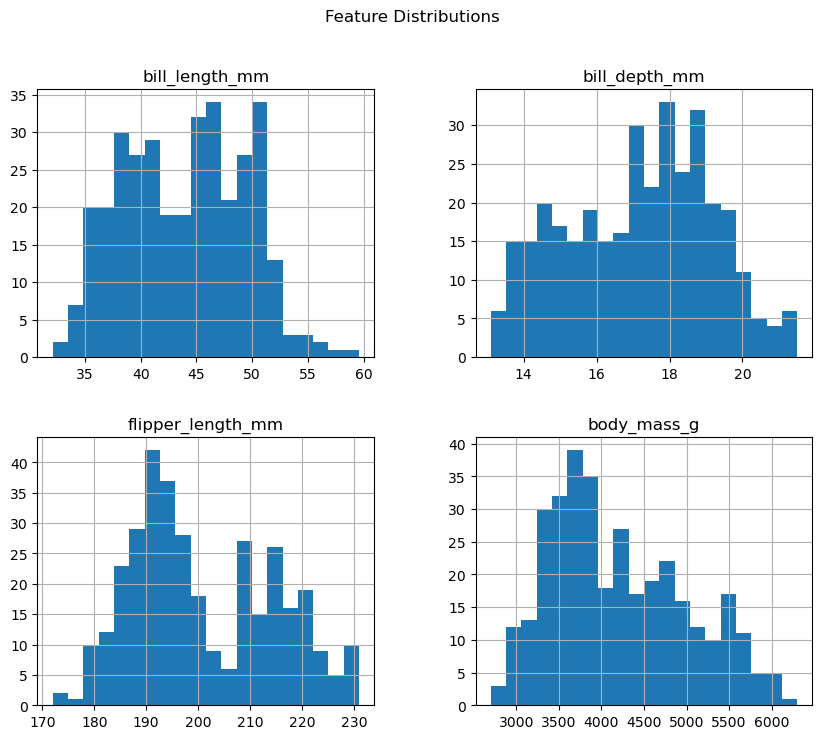

In [39]:
# Overall summary
df.describe(include='all')
#df.describe()

#Visualize Distribution
df[numeric_cols].hist(bins=20, figsize=(10,8))
plt.suptitle('Feature Distributions')
plt.show()


 bill_length_mm: roughly bell-shaped between ~35–55 mm, slight left skew. <br> bill_depth_mm: more uniform in the 15–19 mm range, with a tail toward deeper bills. <br> flipper_length_mm: bimodal-ish around 185 mm and 215 mm.
<br> body_mass_g: right-skewed—most between 3000–5000 g, a few heavy outliers up to 6000 g.
<br>year: three spikes at 2007, 2008, 2009 (categorical).


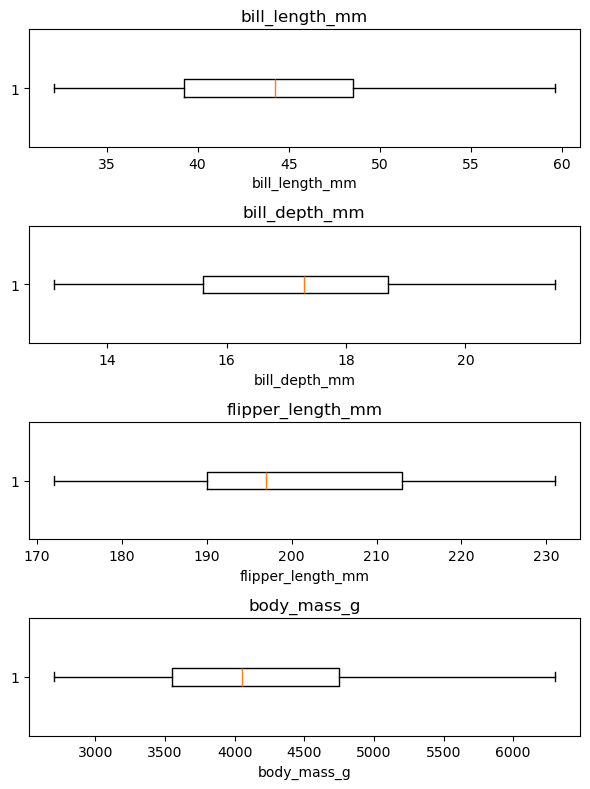

In [40]:
# Each feature boxplot to visualize real scale values
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_clean = df.dropna(subset=numeric_cols)

fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(6,8), sharex=False)
for ax, col in zip(axes, numeric_cols):
    ax.boxplot(df_clean[col], vert=False)
    ax.set_title(col)
    ax.set_xlabel(col)
fig.tight_layout()
plt.show()

No extreme outliers beyond the whiskers for any feature. <br>
All four metrics span a wide but consistent range—bill depth is narrowest (13–21 mm), flipper length widest (170–230 mm).

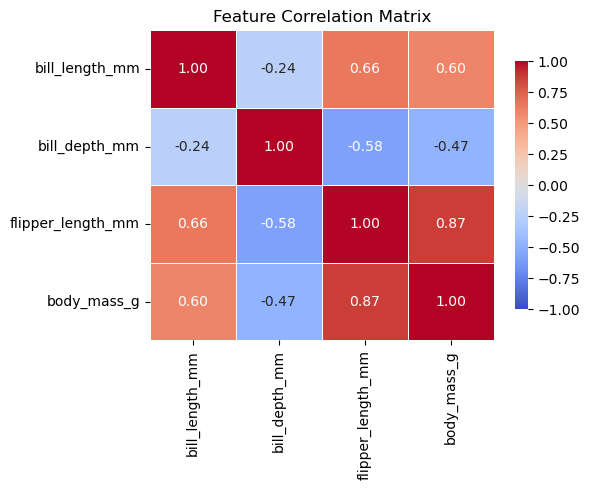

In [3]:
# Crelation Matrix for features
import seaborn as sns

corr = df_clean[numeric_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,         
    linewidths=0.5,           
    cbar_kws={"shrink": .8}  
)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


flipper_length_mm ↔ body_mass_g: very strong positive correlation (0.87). <br>
bill_length_mm moderately correlates with both flipper length (0.66) and body mass (0.60).<br>
bill_depth_mm is negatively correlated with flipper length (–0.58) and body mass (–0.47).

/var/folders/71/kt3th06j0w36j864cy126bwm0000gn/T/ipykernel_12262/68926848.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


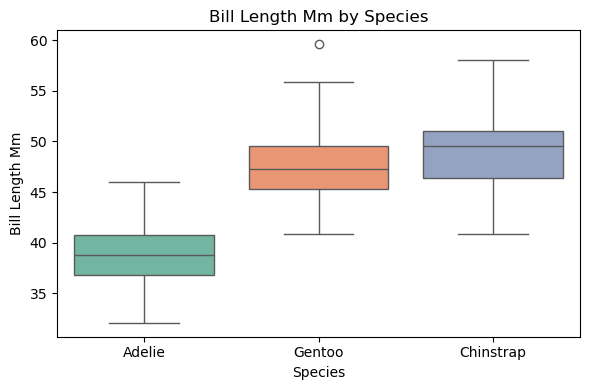

/var/folders/71/kt3th06j0w36j864cy126bwm0000gn/T/ipykernel_12262/68926848.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


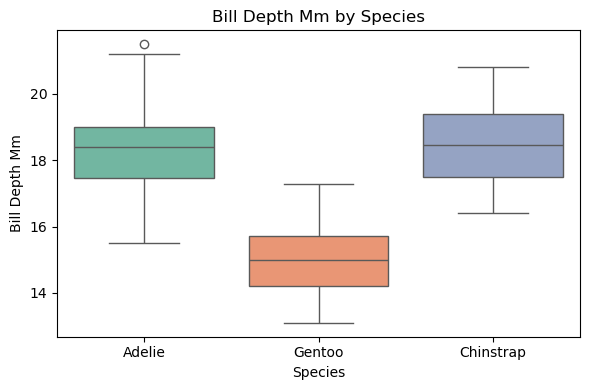

/var/folders/71/kt3th06j0w36j864cy126bwm0000gn/T/ipykernel_12262/68926848.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


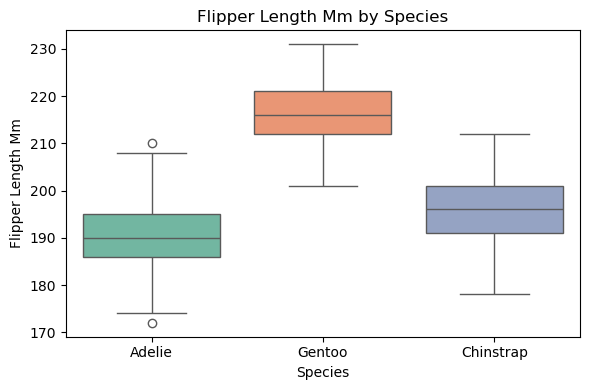

/var/folders/71/kt3th06j0w36j864cy126bwm0000gn/T/ipykernel_12262/68926848.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


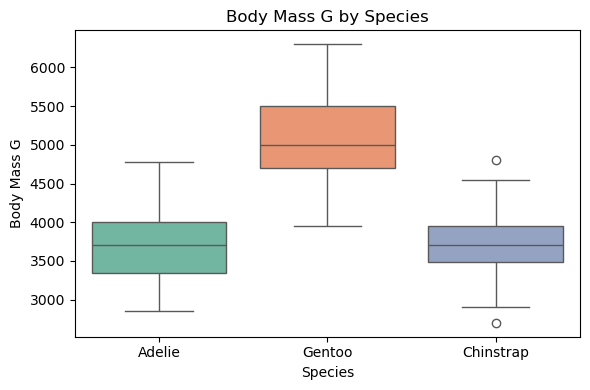

In [42]:
#Boxplots of ranges
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        x="species",
        y=col,
        data=df_clean,
        palette="Set2",        # pretty :)
        showfliers=True       # show outliers, likely will leave them in due to limited data volume
    )
    plt.title(f"{col.replace('_', ' ').title()} by Species")
    plt.xlabel("Species")
    plt.ylabel(col.replace('_', ' ').title())
    plt.tight_layout()
    plt.show()

Adelie: smallest bills (length 37–43 mm, depth 15.5–19 mm), shortest flippers (175–202 mm), lightest mass (2900–4100 g). <br>
Gentoo: longest flippers (207–225 mm) and heaviest mass (3950–5750 g), moderate bill length (45–50 mm) and shallowest bills (14–16 mm). <br>
Chinstrap: largest bills (length 47–58 mm, depth 17–21 mm), mid-range flipper length (195–218 mm) and body mass (3450–4500 g).

`Helpful outcomes`  

(344, 8)


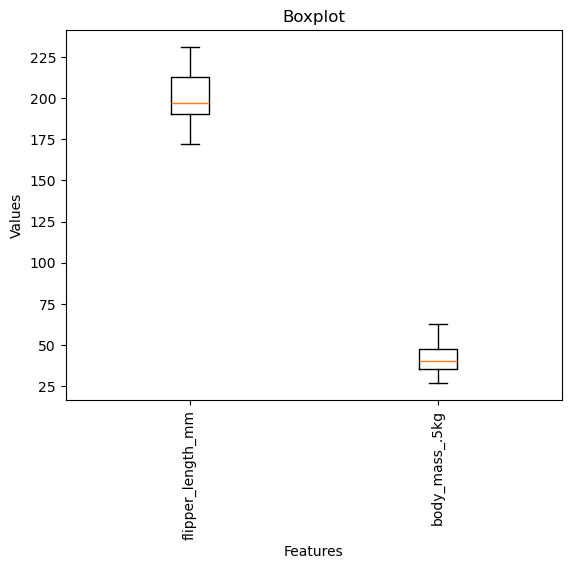

In [11]:
# Assorted Notes and Tips:
#=> data transformations assist with scaling to build compound graphs
#=> Mean subsitution is a viable option. is it worth it?
'''
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins  #via !pip install palmerpenguins
df = load_penguins()

print(df.shape)
df.head()

# Divide 'body_mass_g' column by 1000
df['body_mass_.5kg'] = df['body_mass_g'] / 100

df_subset = df.drop(['species', 'sex', 'island','year','body_mass_g','bill_length_mm','bill_depth_mm'], axis=1)
df_subset.dropna(inplace=True)  #drops an NaN data!
plt.boxplot(df_subset.values)
plt.xticks(range(1, len(df_subset.columns) + 1), df_subset.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot')
plt.show()
'''

### **`Stage.2`** **=>**  **`Part 2: Feature Selection and Engineering`**  

**`Stage.2: Feature Selection and Engineering`**  
```
- 2.1 Identify features to the prediction of penguin species.  
- 2.2 Select the most informative features using feature selection techniques
 like univariate analysis, feature importance ranking, and dimensionality reduction.  
- 2.3 Consider engineering new features by combining or transforming existing features.  
- - Huh? It's as simple as multiplying one variable with another in hopes of improving predictive power.  
```

`Stage.2.Tasks and outcomes`  
`Stage.2.Task.1` => Given prior learnings logically assemble your feature selection and engineering.    
`Stage.2.Task.2` => Add pertinent learnings and outcomes as bullets to the Executive Summary.  


#### **`Task.2.solution`**

In [41]:
# Redone to use prepped df-clean, drop categorical na values, conduct an 80/10/110 split
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# drop na values from these features
df_model = df_clean.dropna(subset=['island','sex']).copy()

# define raw X and y
feature_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm',
                'body_mass_g','island','sex','year']
X_raw = df_model[feature_cols]
y       = df_model['species']

# 10% hold-out
X_temp, X_holdout, y_temp, y_holdout = train_test_split(
    X_raw, y, test_size=0.10, stratify=y, random_state=42)

# of the remaining 90%,  off 11.11% → 10% of original for val (there has to be another way to do this just direct splitting 80/10/10)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1111, stratify=y_temp, random_state=42)

print(f"Sizes → train: {len(X_train)}, valid: {len(X_val)}, holdout: {len(X_holdout)}")

Sizes → train: 265, valid: 34, holdout: 34


In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif

num_cols   = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','year']

# fit encoder on train
ohe = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = ohe.fit_transform(X_train[['island','sex']])
cat_cols_o = ohe.get_feature_names_out(['island','sex'])

# fit encoder on val/holdout for consistency
def encode_df(df):
    ohe_arr = ohe.transform(df[['island','sex']])
    return pd.DataFrame(
        data = np.hstack([ohe_arr, df[num_cols].values]),
        columns = list(cat_cols_o) + num_cols,
        index   = df.index
    )

X_val_enc     = encode_df(X_val)
X_holdout_enc = encode_df(X_holdout)

# new df with new dummy columns + the remaining numerics
num_cols   = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','year']
cat_cols_o = ohe.get_feature_names_out(['island','sex'])
X_train_enc = pd.DataFrame(
    data = np.hstack([X_train_ohe, X_train[num_cols].values]),
    columns = list(cat_cols_o) + num_cols,
    index   = X_train.index
)



In [12]:
# ANOVA F-scores on TRAIN only
selector = SelectKBest(f_classif, k='all').fit(X_train_enc, y_train)
scores = pd.Series(selector.scores_, index=X_train_enc.columns).sort_values(ascending=False)
print("ANOVA F-scores:\n", scores)

ANOVA F-scores:
 flipper_length_mm    450.136991
bill_length_mm       328.286044
body_mass_g          285.080120
bill_depth_mm        280.749114
island_Dream         161.888071
island_Torgersen      33.145472
year                   0.224853
sex_male               0.175071
dtype: float64


In [13]:
# Random Forest importances on TRAIN only
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42).fit(X_train_enc, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train_enc.columns)\
                  .sort_values(ascending=False)
print("Random Forest importances:\n", importances)


Random Forest importances:
 bill_length_mm       0.319673
flipper_length_mm    0.254951
bill_depth_mm        0.160786
body_mass_g          0.114376
island_Dream         0.099895
island_Torgersen     0.039028
year                 0.005749
sex_male             0.005541
dtype: float64


In [14]:
def add_core_features(df_enc):
    df = df_enc.copy()
    df['bill_area']          = df['bill_length_mm'] * df['bill_depth_mm']
    df['bill_ratio']         = df['bill_length_mm'] / df['bill_depth_mm']
    df['length_per_flipper'] = df['bill_length_mm'] / df['flipper_length_mm']
    df['mass_per_flipper']   = df['body_mass_g']  / df['flipper_length_mm']
    return df

X_train_final     = add_core_features(X_train_enc)
X_val_final       = add_core_features(X_val_enc)
X_holdout_final   = add_core_features(X_holdout_enc)

X_train_final.head()

,island_Dream,island_Torgersen,sex_male,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,bill_area,bill_ratio,length_per_flipper,mass_per_flipper
20,0.0,0.0,0.0,37.8,18.3,174.0,3400.0,2007.0,691.74,2.065574,0.217241,19.540230
97,1.0,0.0,1.0,40.3,18.5,196.0,4350.0,2008.0,745.55,2.178378,0.205612,22.193878
302,1.0,0.0,0.0,50.5,18.4,200.0,3400.0,2008.0,929.20,2.744565,0.252500,17.000000
33,1.0,0.0,1.0,40.9,18.9,184.0,3900.0,2007.0,773.01,2.164021,0.222283,21.195652
297,1.0,0.0,1.0,48.5,17.5,191.0,3400.0,2007.0,848.75,2.771429,0.253927,17.801047


### **`Stage.3`** **=>**  **`Pick 4 - Machine learning and Hyperparameter Tuning`**

**`Stage.3: Machine learning and Hyperparameter Tuning`**  
```
- 3.1 Fine-tune the hyperparameters to optimize their performance.  
     Use techniques like grid or random search to explore different  
     combinations of hyperparameters and their configuration.  
-    Validate tuned models on testing data sets.  
```
- `Stage.3 NEW Learning goal`
- `3.3.note=>` the objective is to take extra time and `read` the  
scikit-learn algorithm homepage to assess features and parameters.  
- `Attempt` to tune a couple parameters and add a bullet of what you  
did in the executive summary.

`Stage.3.Tasks and outcomes`  
`Stage.3.Task.1` => Given prior learnings logically assemble your Machine learning and Hyperparameter Tuning.    
`Stage.3.Task.2` => Add pertinent learnings and outcomes as bullets to the Executive Summary.  


`Alogithm homepage with hyperparameters`  

- Perceptron
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

- Linear Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Logistic Regression
- https://scikit-learn.org/stable/modules/generated/sklearnlinear_model.LogisticRegression.html#sklearn-linear-model-logisticregression

- Naïve Bayes
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn-naive-bayes-gaussiannb

- k-Nearest Neighbor
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

- Decision Tree
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier

- Random Forest
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier

- Support Vector Machine
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn-svm-svc

- Neural Networks/ Convolutional Neural Networks
- https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-network-models-supervised



In [11]:
#=>Enter Answer (Pick 4 from the above and extend over at least one cell per approach)

#---- suggested order for each approach -----
# SUPERVISED APPROACH: [approach]
# Initial Performance Results (Validation):
# Hyper Parameter Exploration Results (Validation):

In [16]:
# Approach: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initial 
lr = LogisticRegression(max_iter=5000, random_state=42)
lr.fit(X_train_final, y_train)
y_pred = lr.predict(X_val_final)
print("Initial LR Accuracy:", accuracy_score(y_val, y_pred))

# 2) Hyperparameter grid
param_grid = {
    'C':       [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver':  ['lbfgs']
}
grid = GridSearchCV(
    LogisticRegression(max_iter=5000, random_state=42),
    param_grid, cv=5, n_jobs=-1
)

grid.fit(X_train_final, y_train)

# 3) Tuned performance on validation set
best_lr     = grid.best_estimator_
print("Best LR Params:", grid.best_params_)

y_pred_tuned = best_lr.predict(X_val_final)
print("Tuned LR Accuracy:", accuracy_score(y_val, y_pred_tuned))
print(classification_report(y_val, y_pred_tuned))



Initial LR Accuracy: 1.0


/Users/kevhhu/miniforge3/envs/irisarm/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/kevhhu/miniforge3/envs/irisarm/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/kevhhu/miniforge3/envs/irisarm/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain

Best LR Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned LR Accuracy: 1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      1.00      1.00        12

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [18]:
# Approach: k-Nearest Neighbors KNN
from sklearn.neighbors import KNeighborsClassifier

# Initial default
knn = KNeighborsClassifier()
knn.fit(X_train_final, y_train)
print("Initial KNN Accuracy:", accuracy_score(y_val, knn.predict(X_val_final)))


# Hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights':     ['uniform', 'distance']
}
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_final, y_train)

# 3) Tuned performance on validation set
best_knn = grid.best_estimator_
print("Best KNN Params:", grid.best_params_)
print("Tuned KNN Accuracy:", accuracy_score(y_val, best_knn.predict(X_val_final)))


Initial KNN Accuracy: 0.9411764705882353
Best KNN Params: {'n_neighbors': 9, 'weights': 'distance'}
Tuned KNN Accuracy: 0.9411764705882353


In [19]:
# Approach: Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initial 
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_final, y_train)
print("Initial DT Accuracy:", accuracy_score(y_val, dt.predict(X_val_final)))

# Hyperparameter grid
dt_param_grid = {
    'criterion':         ['gini', 'entropy'],
    'max_depth':         [None, 3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf':  [1, 2, 4, 8],
    'max_features':      [None, 'sqrt', 'log2']
}
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid, cv=5, n_jobs=-1
)
dt_grid.fit(X_train_final, y_train)

# Tuned performance
best_dt = dt_grid.best_estimator_
print("Best DT Params:", dt_grid.best_params_)
print("Tuned DT Accuracy:", accuracy_score(y_val, best_dt.predict(X_val_final)))


Initial DT Accuracy: 0.9705882352941176
Best DT Params: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Tuned DT Accuracy: 0.9705882352941176


In [21]:
#  Approach: Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initial default
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_final, y_train)
print("Initial RF Accuracy:", accuracy_score(y_val, rf.predict(X_val_final)))

# Hyperparameter grid
rf_param_grid = {
    'n_estimators':      [50, 100, 200, 500],
    'criterion':         ['gini', 'entropy'],
    'max_depth':         [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':  [1, 2, 4],
    'max_features':      ['sqrt', 'log2', 0.5]
}
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid, cv=5, n_jobs=-1
)
rf_grid.fit(X_train_final, y_train)

# 3) Tuned performance
best_rf = rf_grid.best_estimator_
print("Best RF Params:", rf_grid.best_params_)
print("Tuned RF Accuracy:", accuracy_score(y_val, best_rf.predict(X_val_final)))


Initial RF Accuracy: 0.9705882352941176
Best RF Params: {'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned RF Accuracy: 1.0


## **`Stage.4.`** **=>**  **`Part 4: Model Interpretation and Validation`**

**`Part 4: Model Interpretation and Validation`**  
```
- 4 Interpret the trained models to understand the relationship  
     between their features and the predicted penguin species.  
-  Ensure robustness and reliability and validate with
     k-fold, cross-validation, and holdout to name a few.
```

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Enter answer (Use the results from the 4 algorithms you picked and extend over at least one cell per approach)
#Evaluate using k-fold validation (k=5).
#Evaluate against the Holdout Set without changing hyperparameters.


In [26]:
# Logistic Regression
# Model Interpretation on the FINAL training set
coef = best_lr.coef_                 # shape = (n_classes, n_features)
classes = best_lr.classes_
feat_names = X_train_final.columns   # final features

coef_df = pd.DataFrame(
    coef.T,
    index=feat_names,
    columns=[f"coef({c})" for c in classes]
).sort_values(by=f"coef({classes[0]})", ascending=False)

print("Logistic Regression coefficients:\n", coef_df)

odds_df = np.exp(coef_df)
print("\nOdds ratios:\n", odds_df)

# 5‐fold cross‐validation on the FINAL training set
cv_scores = cross_val_score(
    best_lr,
    X_train_final, y_train,
    cv=5,
    scoring="accuracy"
)
print(f"\n5-Fold CV Accuracy (train only): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Holdout evaluation
y_hold_pred = best_lr.predict(X_holdout_final)
hold_acc = accuracy_score(y_holdout, y_hold_pred)

print(f"\nHold-out Accuracy: {hold_acc:.3f}")
print("\nHold-out Classification Report:")
print(classification_report(y_holdout, y_hold_pred))

Logistic Regression coefficients:
                     coef(Adelie)  coef(Chinstrap)  coef(Gentoo)
bill_depth_mm           0.243592        -0.217581     -0.026011
sex_male                0.128870        -0.122726     -0.006143
island_Torgersen        0.128218        -0.123099     -0.005118
bill_area               0.022659         0.028059     -0.050718
year                    0.014113         0.003218     -0.017331
mass_per_flipper        0.005298         0.011245     -0.016543
body_mass_g            -0.001888        -0.007230      0.009118
length_per_flipper     -0.002926         0.002772      0.000154
bill_ratio             -0.064768         0.056554      0.008214
flipper_length_mm      -0.066815        -0.079426      0.146241
island_Dream           -0.171778         0.174975     -0.003198
bill_length_mm         -0.576208         0.511753      0.064455

Odds ratios:
                     coef(Adelie)  coef(Chinstrap)  coef(Gentoo)
bill_depth_mm           1.275823         0.804462     

In [27]:
# KNN 
# 5‐Fold CV on the FINAL training set
knn_cv_scores = cross_val_score(
    best_knn,
    X_train_final, y_train,
    cv=5,
    scoring="accuracy"
)
print(f"KNN 5-Fold CV Accuracy: {knn_cv_scores.mean():.3f} ± {knn_cv_scores.std():.3f}")

# Holdout evaluation
y_hold_knn = best_knn.predict(X_holdout_final)
knn_hold_acc = accuracy_score(y_holdout, y_hold_knn)
print(f"\nKNN Hold-out Accuracy: {knn_hold_acc:.3f}")
print("\nKNN Hold-out Classification Report:")
print(classification_report(y_holdout, y_hold_knn))

KNN 5-Fold CV Accuracy: 0.883 ± 0.048

KNN Hold-out Accuracy: 0.882

KNN Hold-out Classification Report:
              precision    recall  f1-score   support

      Adelie       0.92      0.80      0.86        15
   Chinstrap       0.86      0.86      0.86         7
      Gentoo       0.86      1.00      0.92        12

    accuracy                           0.88        34
   macro avg       0.88      0.89      0.88        34
weighted avg       0.89      0.88      0.88        34



In [28]:
# Feature importances
dt_imps = pd.Series(
    best_dt.feature_importances_,
    index=X_train_final.columns
).sort_values(ascending=False)
print("Decision Tree feature importances:\n", dt_imps)

# 5-Fold CV on the FINAL training set
dt_cv_scores = cross_val_score(
    best_dt,
    X_train_final, y_train,
    cv=5,
    scoring="accuracy"
)
print(f"\nDecision Tree 5-Fold CV Accuracy: {dt_cv_scores.mean():.3f} ± {dt_cv_scores.std():.3f}")

# 3) Holdout evaluation
y_hold_dt = best_dt.predict(X_holdout_final)
dt_hold_acc = accuracy_score(y_holdout, y_hold_dt)
print(f"\nDecision Tree Hold-out Accuracy: {dt_hold_acc:.3f}")
print("\nDecision Tree Hold-out Classification Report:")
print(classification_report(y_holdout, y_hold_dt))

Decision Tree feature importances:
 bill_ratio            0.579439
island_Dream          0.397316
mass_per_flipper      0.015764
bill_length_mm        0.007481
island_Torgersen      0.000000
sex_male              0.000000
bill_depth_mm         0.000000
flipper_length_mm     0.000000
body_mass_g           0.000000
year                  0.000000
bill_area             0.000000
length_per_flipper    0.000000
dtype: float64

Decision Tree 5-Fold CV Accuracy: 0.985 ± 0.014

Decision Tree Hold-out Accuracy: 0.971

Decision Tree Hold-out Classification Report:
              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        15
   Chinstrap       1.00      0.86      0.92         7
      Gentoo       1.00      1.00      1.00        12

    accuracy                           0.97        34
   macro avg       0.98      0.95      0.96        34
weighted avg       0.97      0.97      0.97        34



In [29]:
# Feature importances
rf_imps = pd.Series(
    best_rf.feature_importances_,
    index=X_train_final.columns
).sort_values(ascending=False)
print("Random Forest feature importances:\n", rf_imps)

# 5-Fold CV on the FINAL training set
rf_cv_scores = cross_val_score(
    best_rf,
    X_train_final, y_train,
    cv=5,
    scoring="accuracy"
)
print(f"\nRandom Forest 5-Fold CV Accuracy: {rf_cv_scores.mean():.3f} ± {rf_cv_scores.std():.3f}")

# Holdout evaluation
y_hold_rf = best_rf.predict(X_holdout_final)
rf_hold_acc = accuracy_score(y_holdout, y_hold_rf)
print(f"\nRandom Forest Hold-out Accuracy: {rf_hold_acc:.3f}")
print("\nRandom Forest Hold-out Classification Report:")
print(classification_report(y_holdout, y_hold_rf))

Random Forest feature importances:
 bill_ratio            0.494853
flipper_length_mm     0.190045
island_Dream          0.135401
length_per_flipper    0.069809
bill_length_mm        0.044659
bill_depth_mm         0.031516
body_mass_g           0.018305
bill_area             0.006826
mass_per_flipper      0.006622
island_Torgersen      0.000953
sex_male              0.000789
year                  0.000223
dtype: float64

Random Forest 5-Fold CV Accuracy: 0.989 ± 0.015

Random Forest Hold-out Accuracy: 1.000

Random Forest Hold-out Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      1.00      1.00        12

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

